# Business Understanding

How do you want to be a good programmer? As a rookie, what tools do you think good programmers use? Whether your career is related to them. In particular, if you choose to enter the industry, how much do you expect to be paid? This can be an important bargaining chip for you and HR.

# Data understanding

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

#make plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#save models
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('survey_results_public.csv')
data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
schema = pd.read_csv('survey_results_schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [4]:
#keep the full-time developers' data
data = data[data['EmploymentStatus']=='Employed full-time']

In [5]:
#keep the data which has positive salary
data = data[data['Salary']>0]

In [6]:
data.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,12438.000000,12409.000000,12400.000000,5472.000000,11590.000000,12438.000000,0.0
mean,26098.866297,7.493674,6.960081,2.641082,8.512252,57381.580844,NaN
std,15786.528346,1.736553,2.129550,5.455677,1.324734,39871.944002,NaN
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.014682,NaN
25%,12095.500000,7.000000,6.000000,0.000000,8.000000,27956.989247,NaN
50%,26038.000000,8.000000,7.000000,1.000000,9.000000,51297.025641,NaN
75%,41320.750000,9.000000,8.000000,2.000000,10.000000,80608.870968,NaN
max,51391.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,NaN


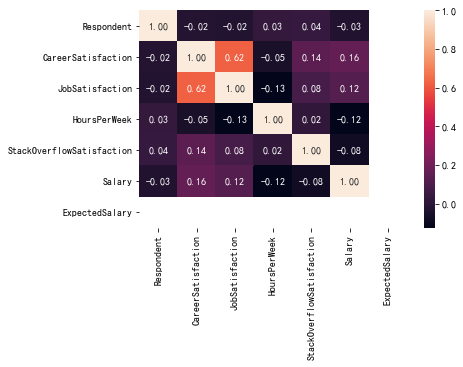

In [7]:
#correlation matrix
sns.heatmap(data.corr(), annot=True, fmt=".2f");

## Q1:What's the most popular IDE among full-time developers?

In [8]:
#flat the nested list
def flatten(input_list):
    """
    Description: This function can flat a nested list and return a sigle and clean list.

    Arguments:
        inpurt_list: the nested list. 

    Returns:
        outpurt_list: the flatten list.
    """
    output_list = []
    while True:
        if input_list == []:
            break
        for index, i in enumerate(input_list):
            if type(i)== list:
                input_list = i + input_list[index+1:]
                break
            else:
                output_list.append(i)
                input_list.pop(index)
                break
    return output_list

In [9]:
ide_list = [x for x in data['IDE'].dropna().str.split(';')]
ide_list = flatten(ide_list)

In [10]:
ide_list = [x.strip() for x in ide_list]

In [11]:
result_list = []
for ide in set(ide_list):
    num = ide_list.count(ide)
    result_list.append({
        'IDE': ide,
        'Num': num,
        'Percent':num/data['IDE'].dropna().shape[0]
    })
df_result = pd.DataFrame(result_list, columns=['IDE', 'Num', 'Percent'])
#delete nan data
df_result.dropna(inplace=True)

df_result.set_index('IDE', inplace=True)

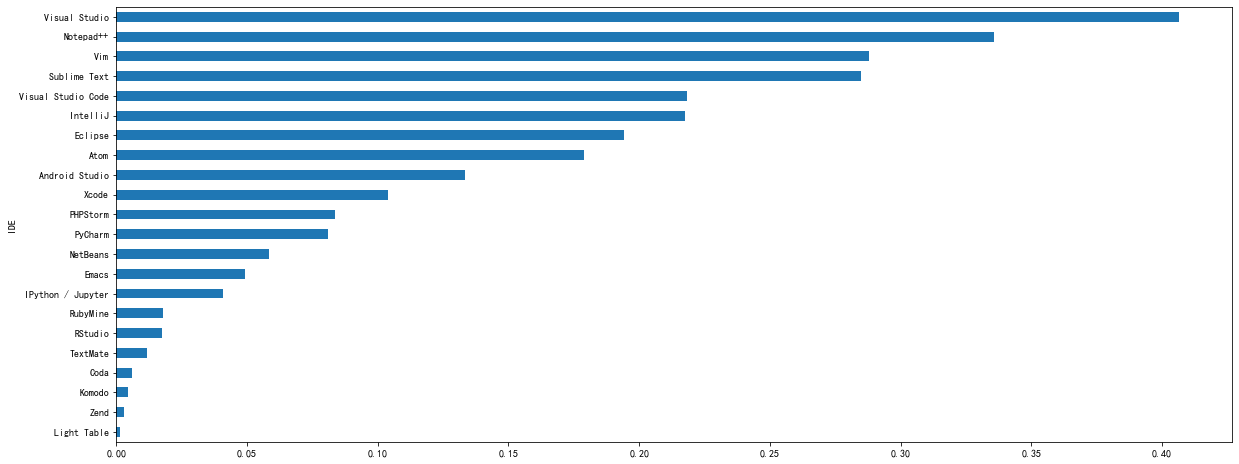

In [12]:
#proportion of users with different IDE
df_result.sort_values('Percent', inplace=True)

df_result['Percent'].plot(kind='barh', figsize=(20,8));

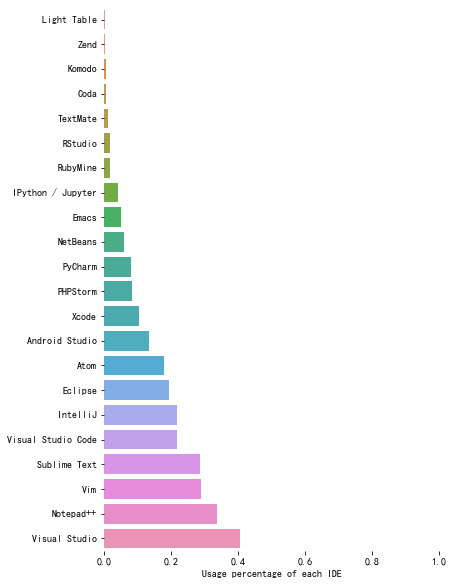

In [13]:
#make plot with seaborn, for posting on the MEDIUM
f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(x=df_result.Percent, y=df_result.index)

ax.set(xlim=(0, 1), ylabel="",
       xlabel="Usage percentage of each IDE")
sns.despine(left=True, bottom=True)

- The most popular IDE is vs, followed by Notepad + +. Vim and sublime text account for the same proportion;

### Q:What is the most popular IDE for developers with a programming life of 1 year?

In [14]:
#sub dataset
df = data[data['YearsProgram']=='Less than a year']

In [15]:
ide_list = [x for x in df['IDE'].dropna().str.split(';')]
ide_list = flatten(ide_list)

ide_list = [x.strip() for x in ide_list]

result_list = []
for ide in set(ide_list):
    num = ide_list.count(ide)
    result_list.append({
        'IDE': ide,
        'Num': num,
        'Percent':num/df.shape[0]
    })
df_result = pd.DataFrame(result_list, columns=['IDE', 'Num', 'Percent'])
#delete nan data
df_result.dropna(inplace=True)
df_result.sort_values('Num', ascending=False, inplace=True)

df_result.set_index('IDE', inplace=True)

df_result

,Num,Percent
IDE,,
Visual Studio,23,0.319444
Sublime Text,20,0.277778
Notepad++,19,0.263889
Android Studio,12,0.166667
Eclipse,10,0.138889
Visual Studio Code,10,0.138889
Vim,8,0.111111
Xcode,8,0.111111
Atom,7,0.097222


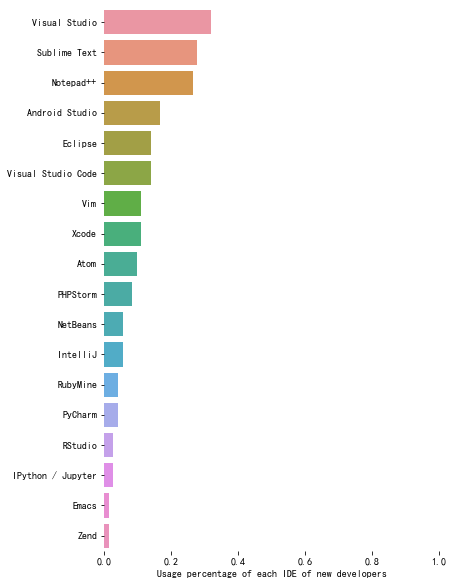

In [16]:
#make plot with seaborn, for posting on the MEDIUM
f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(x=df_result.Percent, y=df_result.index)

ax.set(xlim=(0, 1), ylabel="",
       xlabel="Usage percentage of each IDE of new developers")
sns.despine(left=True, bottom=True)

- Vs is still a popular ide. With the simple sublime text ranking, it is a good choice for novices.

## Q2:What is the difference in revenue between different programming experiences?

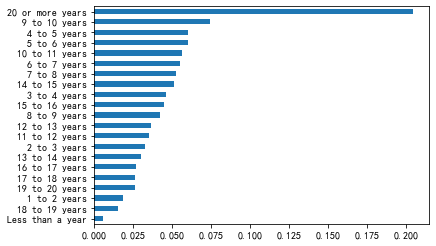

In [17]:
#Distribution of different programming age levels
years = data['YearsProgram'].value_counts().sort_values()/data.shape[0]
years.plot.barh();

In [18]:
#make programming years data Numerical 
years_program_dict={
    'Less than a year':0.5,
    '1 to 2 years':1.5,
    '2 to 3 years':2.5,
    '3 to 4 years':3.5,
    '4 to 5 years':4.5,
    '5 to 6 years':5.5,
    '6 to 7 years':6.5,
    '7 to 8 years':7.5,
    '8 to 9 years':8.5,
    '9 to 10 years':9.5,
    '10 to 11 years':10.5,
    '11 to 12 years':11.5,
    '12 to 13 years':12.5,
    '13 to 14 years':13.5,
    '14 to 15 years':14.5,
    '15 to 16 years':15.5,
    '16 to 17 years':16.5,
    '17 to 18 years':17.5,
    '18 to 19 years':18.5,
    '19 to 20 years':19.5,
    '20 or more years':20
}

df = data.dropna(subset=['YearsProgram'])
#transform
df['YearsProgram'] = df['YearsProgram'].map(years_program_dict)

In [19]:
#median income for different years
years_list = df['YearsProgram'].value_counts().index.tolist()
result = []
for year in years_list:
    df_temp = df[df['YearsProgram']==year]
    result.append({
        'Years':year,
        'Salary':int(np.round(df_temp['Salary'].median(), 0)),
        'Count':df_temp.shape[0],
        'Percent':df_temp.shape[0]/df.shape[0]
    })
df_result = pd.DataFrame(result, columns=['Years', 'Salary', 'Count', 'Percent'])
df_result.sort_values('Salary', ascending=False, inplace=True)
df_result.reset_index(drop=True, inplace=True)

#Cumulative sum
df_result['Cum_percent'] = df_result['Percent'].cumsum()
df_result

,Years,Salary,Count,Percent,Cum_percent
0,20.0,79545,2541,0.204474,0.204474
1,17.5,67270,328,0.026394,0.230868
2,18.5,65000,188,0.015128,0.245997
3,19.5,65000,323,0.025992,0.271988
4,16.5,60108,330,0.026555,0.298543
5,14.5,59140,639,0.051420,0.349964
6,15.5,56206,559,0.044983,0.394946
7,13.5,53030,371,0.029854,0.424801
8,11.5,51000,435,0.035004,0.459805
9,12.5,48815,452,0.036372,0.496178


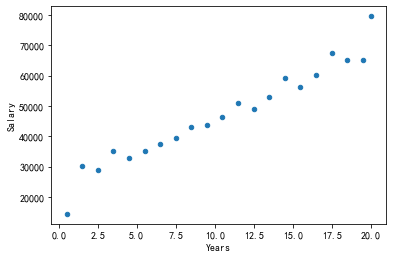

In [20]:
#Scatter chart of programming years and median income
df_result.plot.scatter(x='Years', y='Salary');

In [21]:
#model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(np.array(df_result['Years']).reshape(-1,1), df_result['Salary'])

#coefficient
print('k',linreg.coef_[0])
print('b', linreg.intercept_)
print('y={}*x+{}'.format(linreg.coef_[0], linreg.intercept_))

k 2475.2364234262445
b 21259.999373629817
y=2475.2364234262445*x+21259.999373629817


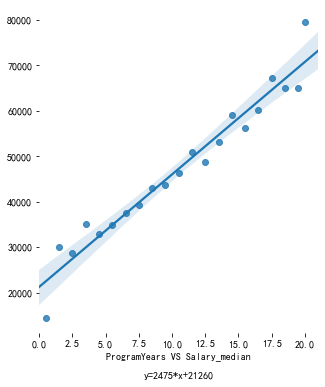

In [22]:
#making plot with seaborn
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x='Years', y='Salary', data=df_result)
ax.set(xlim=(0, 21), ylabel="",
       xlabel="ProgramYears VS Salary_median\n\ny=2475*x+21260")
sns.despine(left=True, bottom=True)

- On the whole, the more experience in programming, the higher the income;

- For full-time developers, it can be expected that wages will rise by 2500 in less than a year. If you don't reach this level, your salary growth is behind the average.

## Q3:What is the impact of different majors on income? Which major pays the most? What is the level of mathematics major?

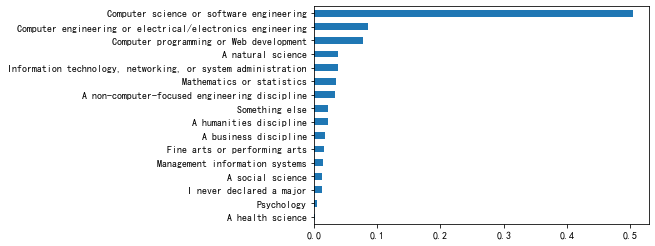

In [23]:
#Distribution of different majors
major = data['MajorUndergrad'].value_counts().sort_values()/data.shape[0]
major.plot.barh();

In [24]:
#consider the full-time developers
df = data.dropna(subset=['MajorUndergrad'])

major_list = df['MajorUndergrad'].value_counts().index.tolist()
result = []
for major in major_list:
    df_temp = df[df['MajorUndergrad']==major]
    result.append({
        'Major':major,
        'Salary':int(np.round(df_temp['Salary'].median(), 0)),
        'Count':df_temp.shape[0],
        'Percent':df_temp.shape[0]/df.shape[0]
    })
df_result = pd.DataFrame(result, columns=['Major', 'Salary', 'Count', 'Percent'])
df_result.sort_values('Salary', ascending=False, inplace=True)
df_result.set_index('Major', drop=True, inplace=True)

#Cumulative sum
df_result['Cum_percent'] = df_result['Percent'].cumsum()
df_result

,Salary,Count,Percent,Cum_percent
Major,,,,
Psychology,75269,53,0.004564,0.004564
Management information systems,70000,175,0.015069,0.019633
A social science,69892,161,0.013864,0.033497
Fine arts or performing arts,68182,191,0.016447,0.049944
A business discipline,64516,217,0.018686,0.068630
A humanities discipline,61000,273,0.023508,0.092138
Mathematics or statistics,60108,434,0.037372,0.129510
A natural science,60000,482,0.041505,0.171015
I never declared a major,57015,156,0.013433,0.184448


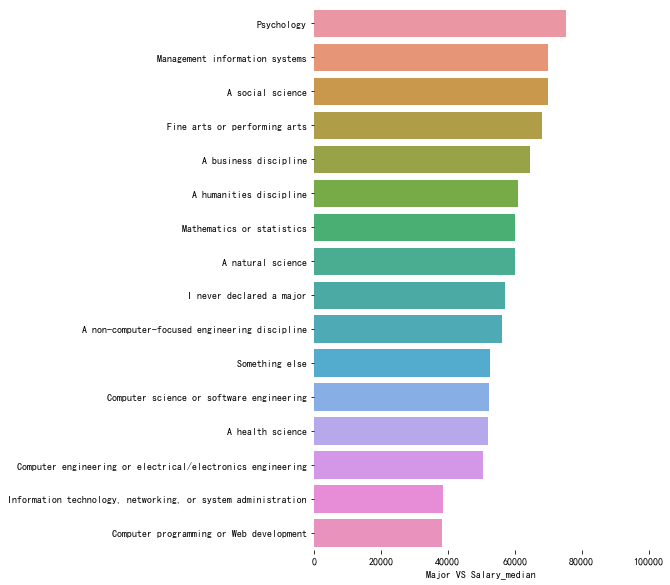

In [25]:
#making plots with seaborn
f, ax = plt.subplots(figsize=(6, 10))
sns.barplot(x=df_result.Salary, y=df_result.index)

ax.set(xlim=(0, 100000), ylabel="",
       xlabel="Major VS Salary_median")
sns.despine(left=True, bottom=True)

- The average median of full-time professionals in psychology is more than 75000, ranking first;

- Mathematics or statistics ranks seventh in the median wage level, 60108. Only 9% of people earn more than math majors.

## Q4:What is the impact of different education levels on income? What's the difference between bachelor, master and hospital?

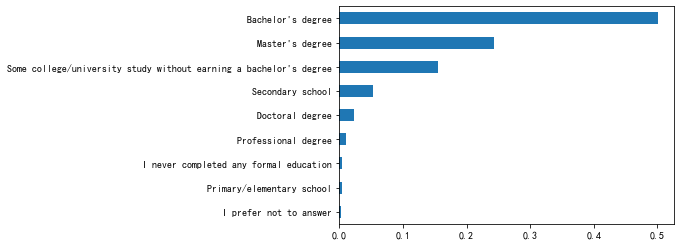

In [65]:
#Distribution of different levels of Education
education = data['FormalEducation'].value_counts().sort_values()/data.shape[0]
education.plot.barh();

In [27]:
#consider the full-time developers
df = data.dropna(subset=['FormalEducation'])

education_list = df['FormalEducation'].value_counts().index.tolist()
result = []
for education in education_list:
    df_temp = df[df['FormalEducation']==education]
    result.append({
        'Education':education,
        'Salary':int(np.round(df_temp['Salary'].median(), 0)),
        'Count':df_temp.shape[0],
        'Percent':df_temp.shape[0]/df.shape[0]
    })
df_result = pd.DataFrame(result, columns=['Education', 'Salary', 'Count', 'Percent'])
df_result.sort_values('Salary', ascending=False, inplace=True)
df_result.set_index('Education', drop=True, inplace=True)

#Cumulative sum
df_result['Cum_percent'] = df_result['Percent'].cumsum()
df_result

,Salary,Count,Percent,Cum_percent
Education,,,,
Doctoral degree,65115,288,0.023155,0.023155
Primary/elementary school,63500,51,0.004100,0.027255
Bachelor's degree,53750,6230,0.500884,0.528140
Master's degree,50538,3031,0.243689,0.771828
Some college/university study without earning a bachelor's degree,50000,1929,0.155089,0.926918
Secondary school,38710,667,0.053626,0.980543
I never completed any formal education,37757,60,0.004824,0.985367
I prefer not to answer,37634,41,0.003296,0.988664
Professional degree,32258,141,0.011336,1.000000


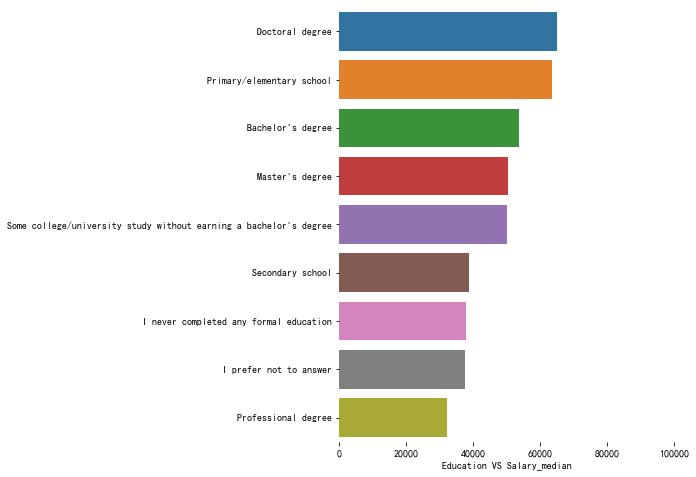

In [28]:
#making plot with seaborn
f, ax = plt.subplots(figsize=(6, 8))
sns.barplot(x=df_result.Salary, y=df_result.index)

ax.set(xlim=(0, 100000), ylabel="",
       xlabel="Education VS Salary_median")
sns.despine(left=True, bottom=True)

- High education does not necessarily mean high income. But from the picture, people with high education are less likely to get a relatively low income.

- In terms of median, bachelor and master are at the same level, while doctoral is much higher. In the short term, there is no significant increase in salary level from bachelor to master, but in the long term, there will be a significant increase when reaching doctoral.

# Prepare Data

In [95]:
# the reasonable salary
data['Salary'].describe()

count     10102.000000
mean      68860.680210
std       35314.468999
min       20000.000000
25%       41879.734848
50%       60000.000000
75%       90000.000000
max      197000.000000
Name: Salary, dtype: float64

It's not likely to have to too low salary, as the 25% salary is more than 27000.I'm interesting in High Salary.So let's adjust our goal to predicting the salary hgiher than 25000

In [96]:
data=data[data['Salary']>=25000]

In [97]:
data.shape

(9660, 154)

In [98]:
# the missing numeric vars
num_vars = data.select_dtypes(include=['float', 'int']).columns
print('{} nemeric vars having missing values'.format(data[num_vars].isnull().any().sum()))
series = data[num_vars].isnull().any()
missing_num_vars = list(series[series>0].index)

#how many num lost?
data[missing_num_vars].describe()

5 nemeric vars having missing values


,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,ExpectedSalary
count,9633.000000,9626.000000,4057.000000,9116.00000,0.0
mean,7.589640,7.075421,2.122751,8.47093,NaN
std,1.642107,2.081090,4.428449,1.32528,NaN
min,0.000000,0.000000,0.000000,0.00000,NaN
25%,7.000000,6.000000,0.000000,8.00000,NaN
50%,8.000000,7.000000,1.000000,9.00000,NaN
75%,9.000000,9.000000,2.000000,10.00000,NaN
max,10.000000,10.000000,40.000000,10.00000,NaN


Data Clean:
- The column 'Salary' is what we are trying to predict, so we shoul make it the target and delete it from the features
- The Respondent is useless for predicting the salary, so we delete it too. As we want a predicted salary so the expected salary is not useful.
- for those numeric columns having missing values, then we can try to use the average num to fill them.
- Using one hot coding will make the distance calculation between features more reasonable.So we create dummy variables for working with categorical variables

In [99]:
def clean_data(df):
    """
    Description: This function can be used to a dataframe and return the X and y for maching learning.

    Arguments:
        df: pandas dataframe with all data. 

    Returns:
        X: the variables
        y: the lable
    """
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(data)    

# Data Modeling

## Measurement

In [100]:
#measurement
def rmspe(y, yhat):
    """
    Description: This function can be used to create the RMSPE.

    Arguments:
        y: the true values. 
        yhat: the predicted values. 
    Returns:
        the value of rmspe
    """   
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    """
    Description: This function can be used to create the RMSPE with xgboost model.

    Arguments:
        y: the result of xgboost model. 
        yhat: the predicted values. 
    Returns:
        the value of rmspe
    """       
    y = y.get_label()
    return "rmspe", rmspe(y, yhat)

In [101]:
#data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Base Model - RamdomForestRegressor

In [102]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#start time
s_time = dt.datetime.now()

#fit the model
rfr = RandomForestRegressor(n_estimators = 15)
rfr.fit(X_train, y_train)

#mesurement
y_pred = rfr.predict(X_test)
error = rmspe(y_test, y_pred)
print('RMSPE: {:.4f}'.format(error))

#end time
e_time = dt.datetime.now()
print('Time Cost：{}seconds'.format((e_time-s_time).seconds))

#save the model
joblib.dump(rfr, 'saved_model/RandomForest.pkl')
print('Model saved：{}'.format('RandomForest'))

RMSPE: 0.3390
Time Cost：84seconds
Model saved：RandomForest


In [103]:
# t = pd.DataFrame({'y':y_test, 'pred':y_pred})
# t['error'] = (t['pred']/t['y']-1)**2
# t.sort_values('error', ascending=False)

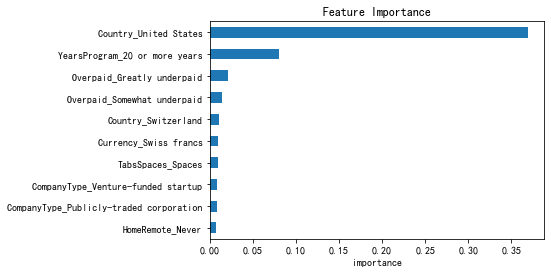

In [104]:
# The most important 10 features
feat_importances = pd.Series(rfr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).sort_values(ascending = True).plot(kind='barh')
plt.xlabel('importance')
plt.title('Feature Importance');

## XGB Model

In [105]:
import xgboost as xgb

#start time
s_time = dt.datetime.now()

params = {"objective": "reg:linear", 
          "booster" : "gbtree", 
          "eta": 0.1,
          "max_depth": 10,
          "subsample": 0.9, 
          "colsample_bytree": 0.7,
          "silent": 1,
          "seed": 10
          }
#num of train times
num_boost_round = 4000

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dtest, 'test')]

#fit the model
model = xgb.train(params, dtrain, num_boost_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)

#measurement
y_pred = model.predict(dtest)
error = rmspe(y_test, y_pred)
print('RMSPE: {:.4f}'.format(error))

#end time
e_time = dt.datetime.now()
print('time cost：{}seconds'.format((e_time-s_time).seconds))

#save model
joblib.dump(model, 'saved_model/xgb.pkl')
print('Model Saved：{}'.format('xgb'))

[0]	train-rmse:71975.97656	test-rmse:70990.38281	train-rmspe:0.89282	test-rmspe:0.89108
Multiple eval metrics have been passed: 'test-rmspe' will be used for early stopping.

Will train until test-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:65516.61719	test-rmse:64635.08984	train-rmspe:0.79753	test-rmspe:0.79411
[2]	train-rmse:59726.50391	test-rmse:58973.78906	train-rmspe:0.71314	test-rmspe:0.70848
[3]	train-rmse:54572.15625	test-rmse:53870.22266	train-rmspe:0.63800	test-rmspe:0.63248
[4]	train-rmse:49995.42188	test-rmse:49418.96094	train-rmspe:0.57133	test-rmspe:0.56630
[5]	train-rmse:45897.64062	test-rmse:45442.04688	train-rmspe:0.51297	test-rmspe:0.50830
[6]	train-rmse:42201.25391	test-rmse:41954.86719	train-rmspe:0.46255	test-rmspe:0.46005
[7]	train-rmse:38922.23047	test-rmse:38893.45312	train-rmspe:0.41879	test-rmspe:0.41991
[8]	train-rmse:36001.70703	test-rmse:36194.98438	train-rmspe:0.38085	test-rmspe:0.38651
[9]	train-rmse:33368.49609	test-rmse:33841.48438	train-rmspe:0

# Evaluate the Results

Although the result from xgboost is better than random forest, But the best error result from xgboost is 0.31.This is not good enough to predict the salary, so we may need to reconsider the data and adjust the model.